In [24]:
#Outlier Using Z-score
#z=(Data-Mean of Data)/Standard Deviation

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
dataset = pd.read_csv(r"D:\\DataScience\\seaborn-data-master\\diamonds.csv")
dataset.head(3)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31


In [27]:
dataset.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [28]:
dataset.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


<Axes: xlabel='price'>

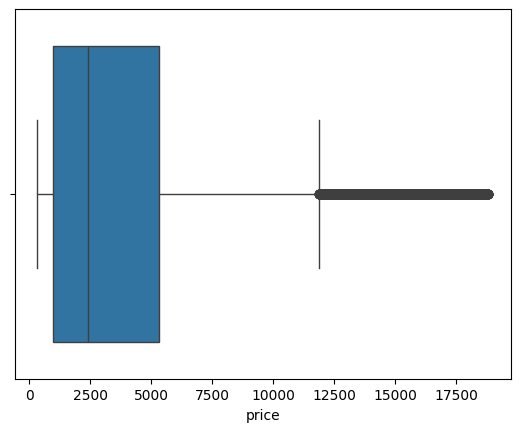

In [29]:
sns.boxplot(x="price",data=dataset)

C:\Users\admin\AppData\Local\Temp\ipykernel_9204\2425984916.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["price"])


<Axes: xlabel='price', ylabel='Density'>

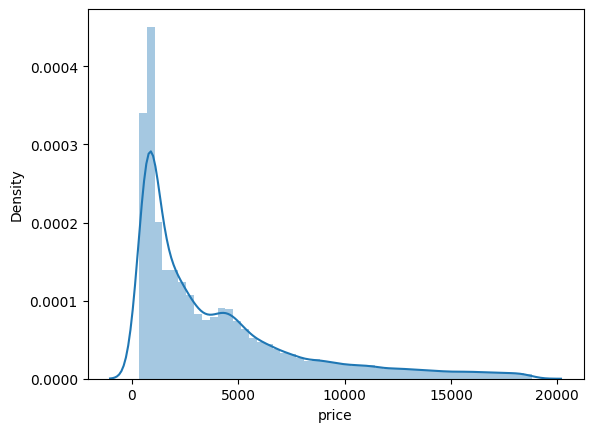

In [41]:
sns.distplot(dataset["price"])

In [31]:
#Normal Method
min_range=dataset["price"].mean()-(3*dataset["price"].std())
max_range=dataset["price"].mean()+(3*dataset["price"].std())
min_range,max_range

(-8035.5194925259, 15901.118936352375)

In [40]:
new_data=dataset[dataset["price"]<=max_range]
new_data.shape

(52734, 11)

<Axes: xlabel='price'>

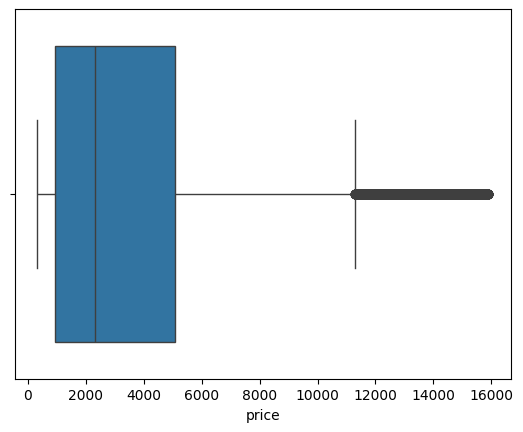

In [33]:
sns.boxplot(x="price",data=new_data)

In [34]:
#Z-Score Method
z_score=(dataset["price"]-dataset["price"].mean())/(dataset["price"].std())
z_score

0       -0.904087
1       -0.904087
2       -0.903836
3       -0.902081
4       -0.901831
           ...   
53935   -0.294728
53936   -0.294728
53937   -0.294728
53938   -0.294728
53939   -0.294728
Name: price, Length: 53940, dtype: float64

In [35]:
z_score>3

0        False
1        False
2        False
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Name: price, Length: 53940, dtype: bool

In [36]:
dataset["z_score"]=z_score

In [37]:
dataset[dataset["z_score"]<3].shape

(52734, 11)